Exploring [Applied Geospatial Datascience Chapter 5](https://github.com/PacktPublishing/Applied-Geospatial-Data-Science-with-Python/blob/main/Chapter05/Chapter%205%20-%20Exploratory%20Data%20Visualization_vf.ipynb).

In [61]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sbn
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
data_path = 'AirBnB Listings EDA/data/'

In [42]:
# Load AirBnB listings data (from http://insideairbnb.com/get-the-data/)
listings = pd.read_csv(data_path + 'listings.csv.gz', compression='gzip')

# Subset to columns of interest
listings_sub = listings[['id','property_type','neighbourhood_cleansed', 'neighbourhood_group_cleansed','price','latitude','longitude']].copy()

In [43]:
# Convert price strings to floats to enable math-ing them
listings_sub['price'] = listings_sub['price'].replace("[$,]", "", regex=True).astype(float)

In [44]:
listings_sub.head()

,id,property_type,neighbourhood_cleansed,neighbourhood_group_cleansed,price,latitude,longitude
0,9357,Entire rental unit,Hell's Kitchen,Manhattan,175.0,40.76724,-73.98664
1,10452,Private room in rental unit,Bedford-Stuyvesant,Brooklyn,90.0,40.68294,-73.95682
2,11943,Private room in home,Flatbush,Brooklyn,150.0,40.63702,-73.96327
3,12192,Private room in rental unit,East Village,Manhattan,70.0,40.72296,-73.98383
4,12937,Private room in townhouse,Long Island City,Queens,165.0,40.74757,-73.94571


In [45]:
listings_sub.describe()

,id,price,latitude,longitude
count,3.916000e+04,39160.000000,39160.000000,39160.000000
mean,2.932430e+17,205.995480,40.729372,-73.945897
std,3.943340e+17,466.662167,0.056645,0.054958
min,2.595000e+03,0.000000,40.500314,-74.251907
25%,1.991531e+07,76.000000,40.688880,-73.982819
50%,4.574172e+07,130.000000,40.726470,-73.953960
75%,7.354150e+17,220.000000,40.762632,-73.926260
max,1.015028e+18,30000.000000,40.911380,-73.713650


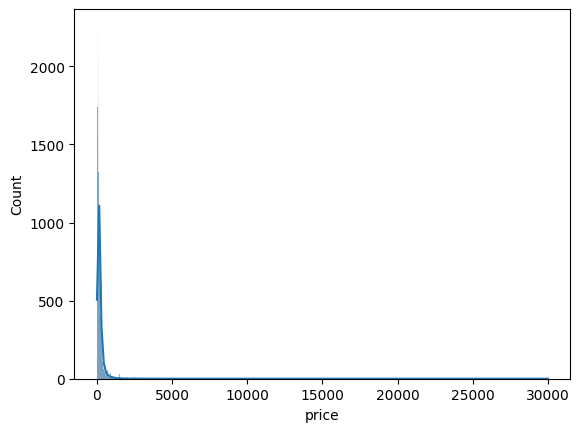

In [50]:
# Show the skewedness of the price distribution
sbn.histplot(listings_sub['price'], kde=True)
plt.show()

In [54]:
# Now let's begin exploratory SPATIAL data analysis.
# Convert the DataFrame into a GeoDataFrame
listings_sub_gdf = gpd.GeoDataFrame(
    listings_sub, 
    geometry=gpd.points_from_xy(listings_sub.longitude, listings_sub.latitude, crs=4326)
)

<GeoAxes: xlabel='None', ylabel='None'>

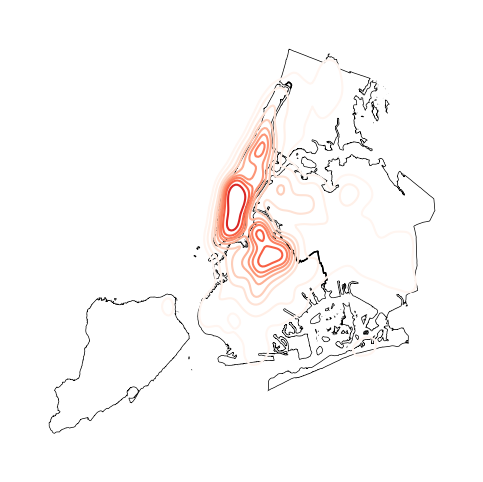

In [78]:
# Create a heatmap depicting the number of listings in each borough bin

# Define the boroughs as spatial heatmap bins
boroughs = gpd.read_file(data_path + r"borough_boundaries.zip")
boroughs = boroughs.to_crs(4326)

# geoplot has a convient way to show points on a basemap (implicitly picking the bounds)
#ax = gplt.webmap(listings_sub_gpd,projection=gcrs.WebMercator())
#gplt.pointplot(listings_sub_gpd, ax=ax)

ax = gplt.kdeplot(listings_sub_gpd,
    clip=boroughs.geometry,
    cmap='Reds',
    projection=gcrs.WebMercator()
)
# Plotting the heatmap on top of the boroughs for context
gplt.polyplot(boroughs, ax=ax, zorder=1)

# We see that most listings are in lower/mid manhattan and north brooklyn